In [1]:
import pandas as pd

df = pd.read_csv(
    "hourly_features.csv",
    parse_dates=["datetime"],
    index_col="datetime"
)

df.head()

,Global_active_power,lag_1,lag_24,lag_168,roll_mean_24,roll_mean_168,hour,day_of_week,is_weekend
datetime,,,,,,,,,
2006-12-23 17:00:00,5.452533,4.349100,1.496800,4.222889,3.099713,1.771265,17,5,1
2006-12-23 18:00:00,3.879400,5.452533,2.686967,3.632200,3.149397,1.772736,18,5,1
2006-12-23 19:00:00,4.117833,3.879400,3.938167,3.400233,3.156883,1.777008,19,5,1
2006-12-23 20:00:00,4.181400,4.117833,3.536067,3.268567,3.183772,1.782441,20,5,1
2006-12-23 21:00:00,3.288433,4.181400,4.548667,3.056467,3.131263,1.783822,21,5,1


In [2]:
split_idx = int(len(df) * 0.8)

train = df.iloc[:split_idx]
test = df.iloc[split_idx:]

X_train = train.drop(columns=["Global_active_power"])
y_train = train["Global_active_power"]

X_test = test.drop(columns=["Global_active_power"])
y_test = test["Global_active_power"]

In [3]:
y_pred_baseline = test["lag_24"]  # yesterday's same hour

In [4]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("Baseline MAE:", mean_absolute_error(y_test, y_pred_baseline))
print("RF MAE:", mean_absolute_error(y_test, y_pred_rf))

print("Baseline RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_baseline)))
print("RF RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

print("RF MAPE:", mape(y_test, y_pred_rf))

Baseline MAE: 0.5242011758969451
RF MAE: 0.32869008763837043
Baseline RMSE: 0.7774427268932594
RF RMSE: 0.47383565051300325
RF MAPE: 43.497301327918976


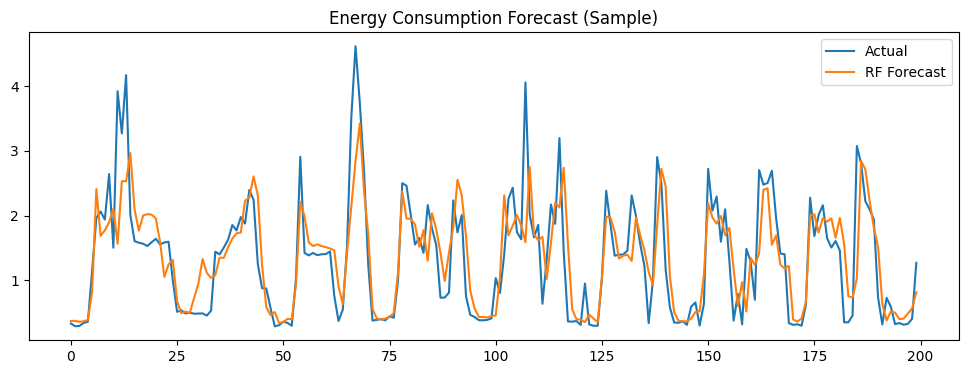

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(y_test.values[:200], label="Actual")
plt.plot(y_pred_rf[:200], label="RF Forecast")
plt.legend()
plt.title("Energy Consumption Forecast (Sample)")
plt.show()